<a href="https://colab.research.google.com/github/johnsl01/linreg/blob/master/linreg2020B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 _Single linear regression - one dependent variable_

y = B0 + B1.X

X    np array of data points (with an addition col of leading Ones)

y    np vector of results

theta np vector of B0, B1  (or occasionally a tuple (B0,B1) 



In [116]:
###############################################
#@title                 IMPORTS               #
###############################################
print ("Imports")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime
print (datetime.now())

from google.colab import files



Imports
2020-10-13 22:42:02.465193


===================================================

In [117]:
print("def predict(X, theta)")
def predict(X, theta):
  # takes m by n matrix X as input and returns an m by 1 vector 
  # containing the predictions h_theta(x^i) for each row x^i, i=1,...,m in X
  ##### replace the next line with your code ##### 

  # Single variable example y = B0 + B1.x
  #   The data point(s) include a leading 1 to assist with the 
  #   B0 coeficient.
  
  # Check for single data point
  #   requires a special case as it arrives as 1D, rather than 2D
  #   and if it does arrive as 2D the else handles it anyway.

  # A single data point is trivial for regression
  #   but the predict function should be generally usable for 
  #   any subset of the data including one data point.
   
  if len(X.shape) == 1 :
    # this is edge case for single point arriving as a vector  
    pred = X[0]*theta[0] + X[1]*theta[1]  

  else : 
    #this the general case for data points in an array
    pred = X[:,0]*theta[0] + X[:,1]*theta[1]  

  # print("predict return : " , pred)
  # print ("Thetas : ",theta[0] ,theta[1])
  # print ("pred [:10] : ",pred [:10])
  return pred
# end def predict


print("def computeCost(X, y, theta)")
def computeCost(X, y, theta):
  print ("ComputeCost : ", X[:3,0], X[:3,1], y[:3], theta)

  print (X.shape, y.shape, theta.shape)
  # function calculates the cost J(theta) and return its value
  ##### replace the next line with your code #####
  
  # This function is already independent of the number of variables
  #   provided the X array carries the variables with a leading 1 on data point(s)
  #   and the theta has the same number of B0, B1, B2 ...  coeficients.
  # However the predict it calls needs to be able to deal with the lenght of the theta 
  #   which corresponds to the number of variables + 1


  # The sequential calculation could be done in fewer steps
  # which would be more memory efficient but less clear.

  # TODO  merge some calculations to tidy up the code and add efficiency
  
  # print ("Compute Cost #1 : " , X.shape, y.shape, theta.shape)

  # Get the value predicted by the current theta values
  costpred = predict (X,theta)
  # print ("Compute Cost #2 :", costpred.shape)

  # get the difference between the predictions and the actuals
  costbase = costpred - y
  # print ("Compute Cost #3 :", costbase.shape)

  # get the square of the differences
  costsq = costbase**2
  # print ("Compute Cost #4 :", costsq.shape)

  # get the sum of the squared differences
  sumcost = costsq.sum()
  # print ("Compute Cost #5 :", sumcost)

  # print (y)
  # print (costpred)
  # print ("Compute Cost #6 :", len(y))  

  # divide the sum of squares by twice the number of data points
  cost = (sumcost)/(2*len(y))
  print ("Compute Cost #7 :", cost)  

  # return the cost of the current theta values
  return cost
# end def computeCost



print("def computeGradient(X, y, theta)")
def computeGradient(X, y, theta):
  # function calulate the gradient of J(theta) and returns its value
  ##### replace the next line with your code #####
  
  # Single variable simple version
  
  # initiate the result
  grad = np.zeros(2)
  
  # print ("Number of coeficients: " , n)
  # print ("Shapes of data, result and theta : " , X.shape, y.shape, theta.shape)
  # print ("Types of  data, result and theta : " , type(X), type(y), type(theta))
  # print ("Sample head of data")
  # for i in range(5) :
      # print (X[i,:])
    
  # Get the value predicted by the current theta values
  costpred = predict (X,theta)
  # print ("Compute Grad #2 :", costpred.shape)
  
  # get the difference between the predictions and the actuals
  costbase = costpred - y
  # print ("Compute Grad #3 :", costbase.shape)  
  
  # calculate the gradient for each coefficient
  # for is inefficient but it is used to iterate over a small
  # range (1 more than the number of variables 
  # i.e the number of coefficients)
  # while numpy array maths are used for the larger dimension
  # (the number of data points)
  
  # get product of differences by current coeficients data point
  costprodb0 = costbase #  X[:,0] is all ones so don't multiply
  costprodb1 = costbase * X[:,1]
  # print ("Compute Grad #4 :", costprod.shape) 
  # get the sum of the cost products
  costprodb0sum = costprodb0.sum()
  costprodb1sum = costprodb1.sum()
  # print ("Compute Grad #5 :", costprodsum)
  # divide by the number of data points
  grad[0] = costprodb0sum / len(y)
  grad[1] = costprodb1sum / len(y)
  # take this outside the for loop and use numpy maths ! 
  # print ("Compute Grad #6 :", grad[i])
  # end for
  # print ("Compute Grad #6 :", grad)
  # return the gradient
  return grad
# end def computeGradient


print (datetime.now())

def predict(X, theta)
def computeCost(X, y, theta)
def computeGradient(X, y, theta)
2020-10-13 22:42:02.934450


In [118]:

print("def gradientDescent(X, y, numparams)")
def gradientDescent(X, y, numparams):
  # iteratively update parameter vector theta
  # -- you should not modify this function

  # initialize variables for learning rate and iterations
  alpha = 0.5
  iters = 10
  cost = np.zeros(iters)
  theta= np.zeros(numparams)

  for i in range(iters):
    theta = theta - alpha * computeGradient(X,y,theta)
    cost[i] = computeCost(X, y, theta)

  return theta, cost



print("def normaliseData(x)")

def normaliseData(x):
  # rescale data to lie between 0 and 1
  scale = x.max(axis=0)
  return (x/scale, scale)
'''
def normaliseData(X):
  # rescale data to lie between 0 and 1
  maxX = X.max(axis=0)
  minX = X.min(axis=0)
  normX = (X - minX)/(maxX - minX)
  scaleX = maxX - minX
  return (normX, scaleX)
'''
# end normaliseData()


print("def splitData(X, y)")
def splitData(X, y):
  # split data into training and test parts
  # ... for now, we use all of the data for training and testing
  Xtrain=X; ytrain=y; Xtest=X; ytest=y
  return (Xtrain, ytrain, Xtest, ytest)


print (datetime.now())

def gradientDescent(X, y, numparams)
def normaliseData(x)
def splitData(X, y)
2020-10-13 22:42:02.959851


In [119]:
print ("def main()")
def main():
  # load the data
  # "https://raw.githubusercontent.com/johnsl01/Titanic_Python/master/titanic_known.csv"
  # data=np.loadtxt('https://raw.githubusercontent.com/johnsl01/linreg/master/stockprices.csv',usecols=(1,2))
  # data=np.loadtxt('https://raw.githubusercontent.com/johnsl01/ML2020A/main/ML_week1.csv',usecols=(0,1))
  data=np.loadtxt('https://raw.githubusercontent.com/johnsl01/ML2020A/main/ML_week1.csv', delimiter=',')
  X=data[:,0]
  y=data[:,1]

  '''
  # plot the data so we can see how it looks
  # (output is in file graph.png)
  fig, ax = plt.subplots(figsize=(20, 12))
  ax.scatter(X, y, label='Data')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_title('X vs Y')
  fig.savefig('graph.png')
  '''


  print ("head (y) : ", y[:10])

  # split the data into training and test parts
  (Xtrain, ytrain, Xtest, ytest)=splitData(X,y)

  # add a column of ones to input data
  m=len(y) # m is number of training data points
  Xtrain = np.column_stack((np.ones((m, 1)), Xtrain))
  (m,n)=Xtrain.shape # m is number of data points, n number of features

  # rescale training data to lie between 0 and 1
  (Xt,Xscale) = normaliseData(Xtrain)
  (yt,yscale) = normaliseData(ytrain)

  # calculate the prediction
  '''
  print('testing the prediction function ...')
  theta=(1,2)
  print('when x=[1,1] and theta is [1,2]) cost = ',predict(np.ones(n),theta))
  print('approx expected prediction is 3')
  print('when x=[[1,1],[5,5]] and theta is [1,2]) cost = ',predict(np.array([[1,1],[5,5]]),theta))
  print('approx expected prediction is [3,15]')
  # input('Press Enter to continue...')
  '''

  '''
  # calculate the cost when theta iz zero
  print('testing the cost function ...')
  theta=np.zeros(n)
  print('when theta is zero cost = ',computeCost(Xt,yt,theta))
  print('approx expected cost value is 0.318')
  # input('Press Enter to continue...')
  '''

  '''
  # calculate the gradient when theta is zero
  print('testing the gradient function ...')
  print('when theta is zero gradient = ',computeGradient(Xt,yt,theta))
  print('approx expected gradient value is [-0.79,-0.59]')
  # input('Press Enter to continue...')
  '''


  # perform gradient descent to "fit" the model parameters
  print('running gradient descent ...')
  theta, cost = gradientDescent(Xt, yt, n)
  print ("head (Xt) : ", Xt[:10,0], Xt[:10,1])
  print ("head (yt) : ", yt[:10])
  print ("shape : ",cost.shape)
  print ("costs[:10] : ",cost[:10])
  print('after running gradientDescent() theta=',theta)
  print('approx expected value is [-1.1703  1.6582]')

  # plot some predictions
  Xpred = np.linspace(X.min(), X.max(), 100)
  Xpred = np.column_stack((np.ones((100, 1)), Xpred))
  ypred = predict(Xpred/Xscale, theta)*yscale
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(Xtest, ytest, color='b', label='Test Data')
  ax.plot(Xpred[:,1], ypred, 'r', label='Prediction')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.legend(loc=2)
  fig.savefig('pred.png')

  # and plot how the cost varies as the gradient descent proceeds
  fig2, ax2 = plt.subplots(figsize=(12, 8))
  ax2.semilogy(cost,'r')
  ax2.set_xlabel('iteration')
  ax2.set_ylabel('cost')
  fig2.savefig('cost.png')

  
  '''
  # plot the cost function
  fig3 = plt.figure(figsize=(20, 12))
  ax3 = fig3.add_subplot(1, 1, 1, projection='3d')
  n=21
  theta0, theta1 = np.meshgrid(np.linspace(-10, 10, n), np.linspace(-10, 10, n))
  cost = np.empty((n,n))
  for i in range(n):
    for j in range(n):
      cost[i,j] = computeCost(Xt,yt,(theta0[i,j],theta1[i,j]))
  ax3.plot_surface(theta0,theta1,cost)
  ax3.set_xlabel('theta0')
  ax3.set_ylabel('theta1')
  ax3.set_zlabel('J(theta)')
  fig3.savefig('J.png')
  '''

  
  '''
  inpchar = input('Press Y and Enter to download images of graphs')
  
  if inpchar == "Y" :
    files.download('graph.png')
    files.download('pred.png')
    files.download('cost.png')
    files.download('J.png')
  else :
    print ("Bypassing graph image download")
  '''

# end def main()  
  
print (datetime.now())


def main()
2020-10-13 22:42:03.023419


2020-10-13 22:42:03.032078
head (y) :  [-509.84590083 -541.11882439 -581.82610087 -386.69944201 -435.97720058
 -555.27650864 -498.42236643 -407.63102761 -549.42614191 -447.84587308]
running gradient descent ...
ComputeCost :  [1. 1. 1.] [0.        0.0013947 0.0027894] [-1.19097942 -1.2640317  -1.35912225] [-0.17059131 -0.0160118 ]
(718, 2) (718,) (2,)
Compute Cost #7 : 0.14429077078624827
ComputeCost :  [1. 1. 1.] [0.        0.0013947 0.0027894] [-1.19097942 -1.2640317  -1.35912225] [-0.25188402  0.01329473]
(718, 2) (718,) (2,)
Compute Cost #7 : 0.13161231149724317
ComputeCost :  [1. 1. 1.] [0.        0.0013947 0.0027894] [-1.19097942 -1.2640317  -1.35912225] [-0.29985701  0.0580366 ]
(718, 2) (718,) (2,)
Compute Cost #7 : 0.12341720121930613
ComputeCost :  [1. 1. 1.] [0.        0.0013947 0.0027894] [-1.19097942 -1.2640317  -1.35912225] [-0.33502897  0.10730954]
(718, 2) (718,) (2,)
Compute Cost #7 : 0.11624436178528375
ComputeCost :  [1. 1. 1.] [0.        0.0013947 0.0027894] [-1.190

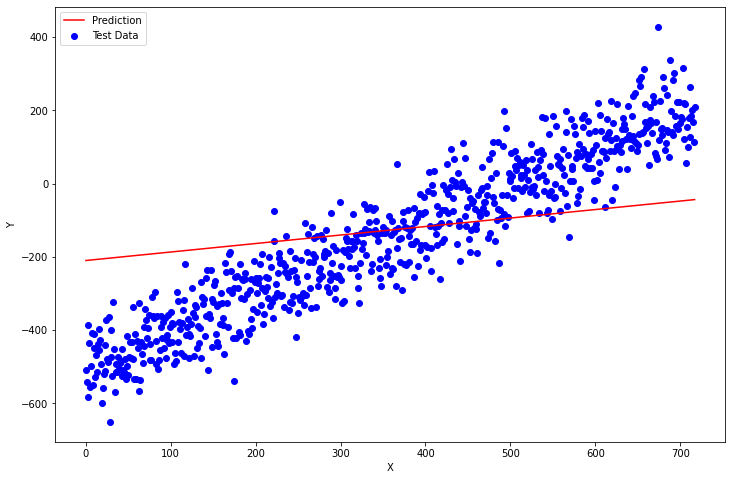

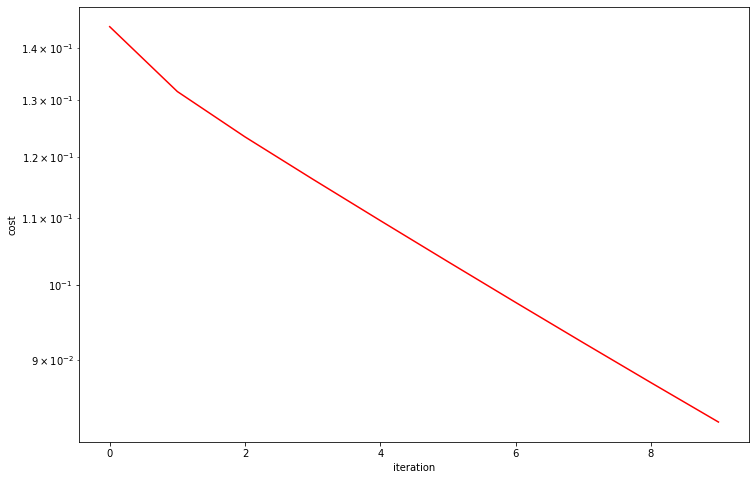

In [120]:
print (datetime.now())

main()

print (datetime.now())
